# Topic 2. Visual data analysis in Python
## Part 2. Overview of Seaborn, Matplotlib and Plotly libraries

## 1.Dataset

In [1]:
# Disable warnings in Anaconda
import warnings

warnings.filterwarnings("ignore")

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

# Increase the default plot size and set the color scheme
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["image.cmap"] = "viridis"
import pandas as pd

#rcParams 는 Matplotlib 의 속성을 포함하는 사전 객체입니다. rcParams 의 figure.figsize 키에 그림 크기를 값으로 할당 

이제 사용할 데이터 세트를 DataFrame에 로드해 보겠습니다. 저는 Kaggle Dataset에서 비디오 게임 판매 및 시청률에 대한 데이터 세트를 선택했습니다. 이 데이터셋의 일부 게임에는 등급이 없습니다. 따라서 모든 가치가 존재하는 게임만 필터링해 보겠습니다.

In [2]:
df=pd.read_csv('video_games_sales.csv').dropna()
print(df.shape)

(6825, 16)


그런 다음 데이터 프레임 요약을 인쇄하여 데이터 유형을 확인하고 모든 항목이 null이 아닌지 확인하십시오.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


우리는 pandas가 개체 유형으로 숫자 특징의 일부를 로드했다는 것을 안다. 우리는 명시적으로 그 칼럼들을 float와 int로 변환할 것이다.

In [4]:
df['User_Score']=df['User_Score'].astype('float64')
df['Years_of_Release']=df['Year_of_Release'].astype('int64')
df["User_Count"] = df["User_Count"].astype("int64")
df["Critic_Count"] = df["Critic_Count"].astype("int64")

결과 데이터 프레임에는 6825개의 예와 16개의 열이 포함되어 있습니다. 처음 몇 개의 항목을 head() 방법으로 살펴보면서 모든 항목이 올바르게 구문 분석되었는지 확인해 보겠습니다. 좀 더 편리하게 하기 위해 이 노트북에 사용할 변수만 나열했습니다.

In [5]:
useful_cols=[
    'Name',
    'Platform',
    'Year_of_Release',
    'Genre',
    'Global_Sales',
    'Critic_Score',
    'Critic_Count',
    'User_Score',
    'User_Count',
    'Rating'
]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006.0,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006.0,Misc,28.92,58.0,41,6.6,129,E


## 2. DataFrame.plot
Seaborn과 Plottly로 돌아가기 전에, 데이터 프레임에서 데이터를 시각화하는 가장 간단하고 종종 가장 편리한 방법인 자체 플롯() 방법에 대해 논의하십시오.

예를 들어, 우리는 국가별, 연도별 비디오 게임 판매 플롯을 만들 것이다. 첫째, 필요한 열만 보관하세요. 그런 다음 연도별 총 매출을 계산하여 데이터프레임의 플롯() 방법을 호출하겠습니다.

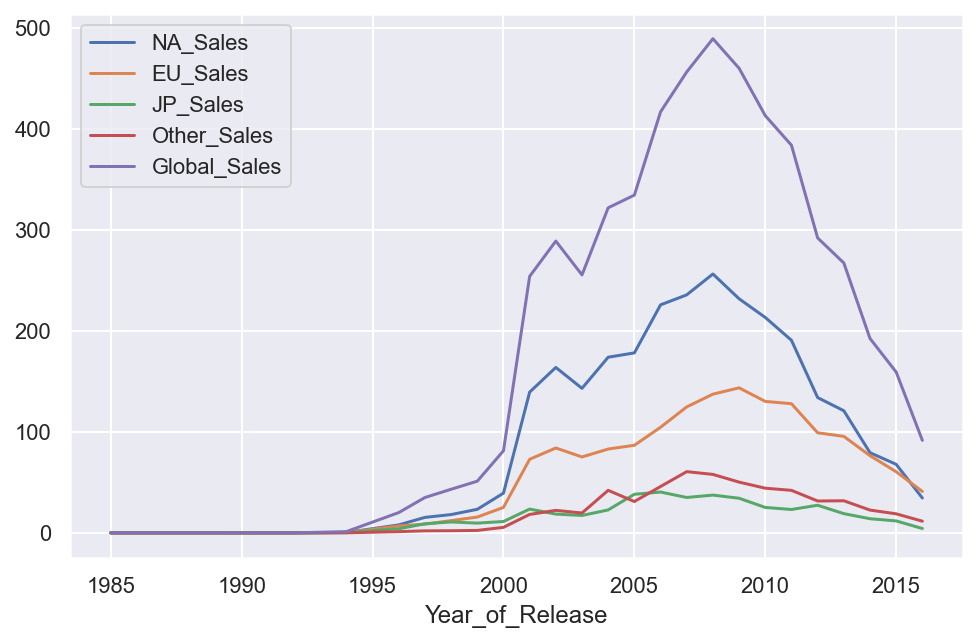

In [6]:
df[[x for x in df.columns if 'Sales' in x]+['Year_of_Release']].groupby('Year_of_Release').sum().plot();

pandas에서 plot() 방법의 구현은 matplotlib에 기초한다.

종류 모수를 사용하여 그림 유형을 막대 차트 등으로 변경할 수 있습니다. 산점도 lib는 일반적으로 그림을 사용자 정의하는 데 매우 유연합니다. 차트에서 거의 모든 항목을 변경할 수 있지만 해당 매개 변수를 찾으려면 설명서를 자세히 살펴봐야 할 수도 있습니다. 예를 들어 파라미터 로트는 x축의 눈금 회전 각도(수직 플롯의 경우)를 담당합니다.

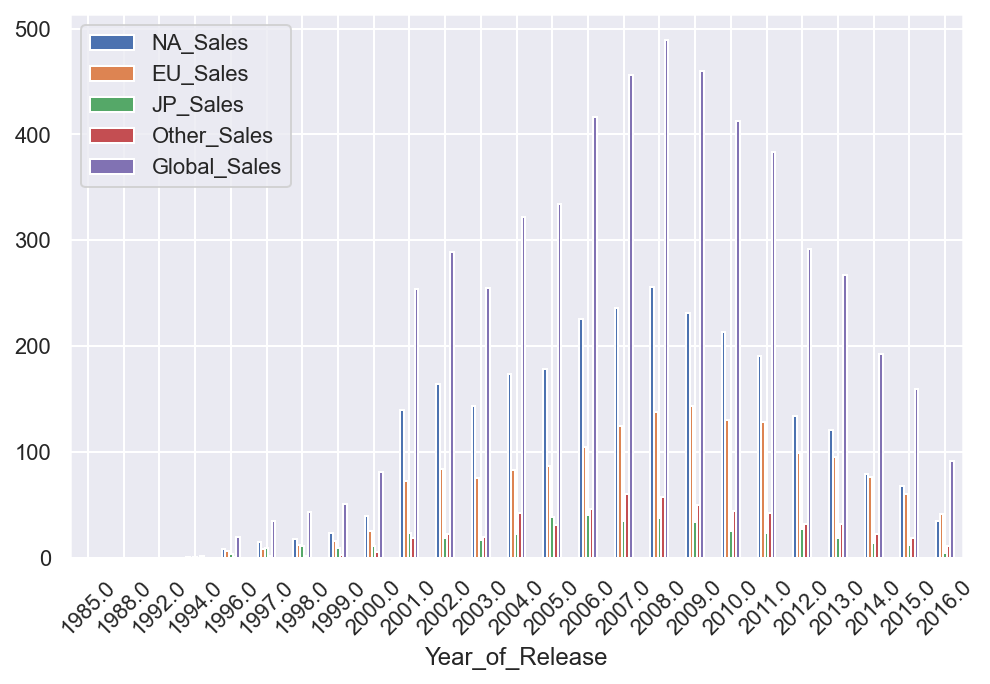

In [7]:
df[[x for x in df.columns if 'Sales' in x]+['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar',rot=45);

## 3. 시본
이제 Seaborn 라이브러리로 이동하겠습니다. Seaborn은 기본적으로 Mattplotlib 라이브러리를 기반으로 한 상위 레벨의 API입니다. 무엇보다도 플롯에 대한 기본 설정이 보다 적합하다는 점에서 후자와 다르다. sns.set() 코드에 수입 seaborn을 추가함으로써, 당신의 줄거리의 이미지는 훨씬 더 좋아질 것이다. 또한 이 라이브러리에는 시각화를 위한 복잡한 도구 집합이 포함되어 있습니다. 그렇지 않으면(즉, bare matplotlib를 사용하는 경우) 상당히 많은 양의 코드가 필요합니다.

### 페어 플롯
이러한 복잡한 그림 중 첫 번째 그림인 기본적으로 산점도 행렬을 생성하는 쌍 관계 그림을 살펴보겠습니다. 이러한 종류의 그림은 단일 출력에서 서로 다른 변수 간의 관계를 시각화하는 데 도움이 됩니다.

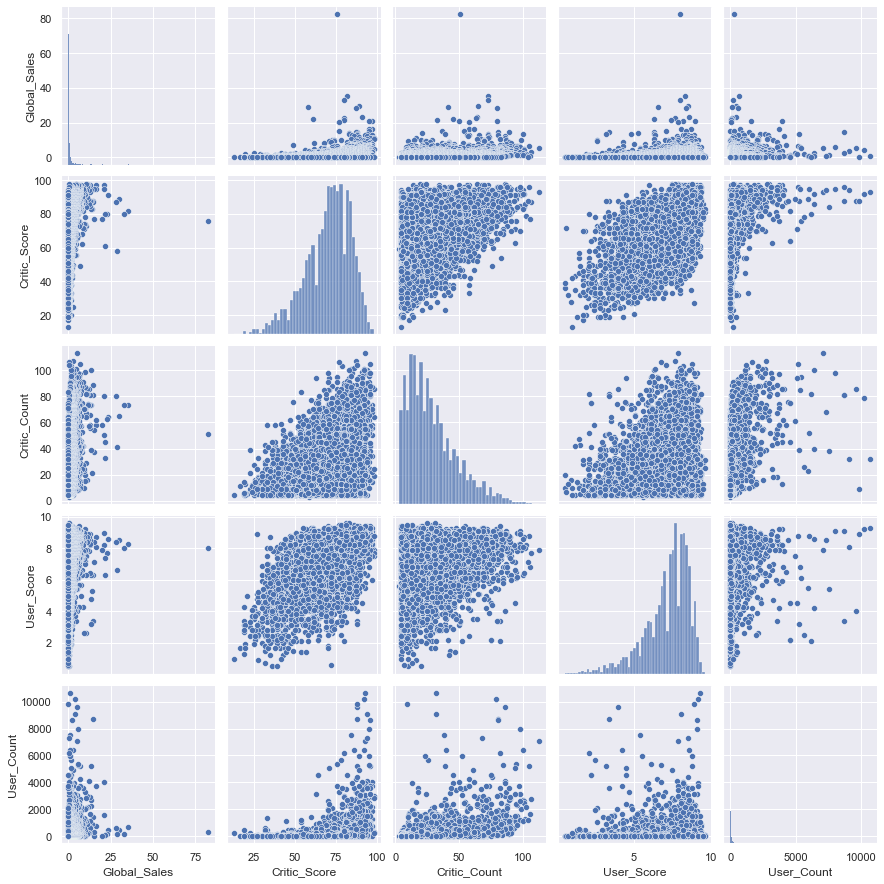

In [8]:
# SVG 형식에서는 pairplot()이 매우 느려질 수 있음
%config InlineBackend.figure_format='png'
sns.pairplot(df[['Global_Sales','Critic_Score','Critic_Count','User_Score','User_Count']]
);

보시는 것처럼 분포 히스토그램은 행렬의 대각선에 있습니다. 나머지 차트는 해당 특성 쌍에 대한 산점도입니다.

### distplot
또한 seaborn's distplot()를 사용하여 관측치 분포를 표시할 수 있다. 예를 들어 평론가의 등급 분포를 살펴보겠습니다. 비평가_점수. 기본적으로 그림에는 히스토그램과 커널 밀도 추정치가 표시됩니다.

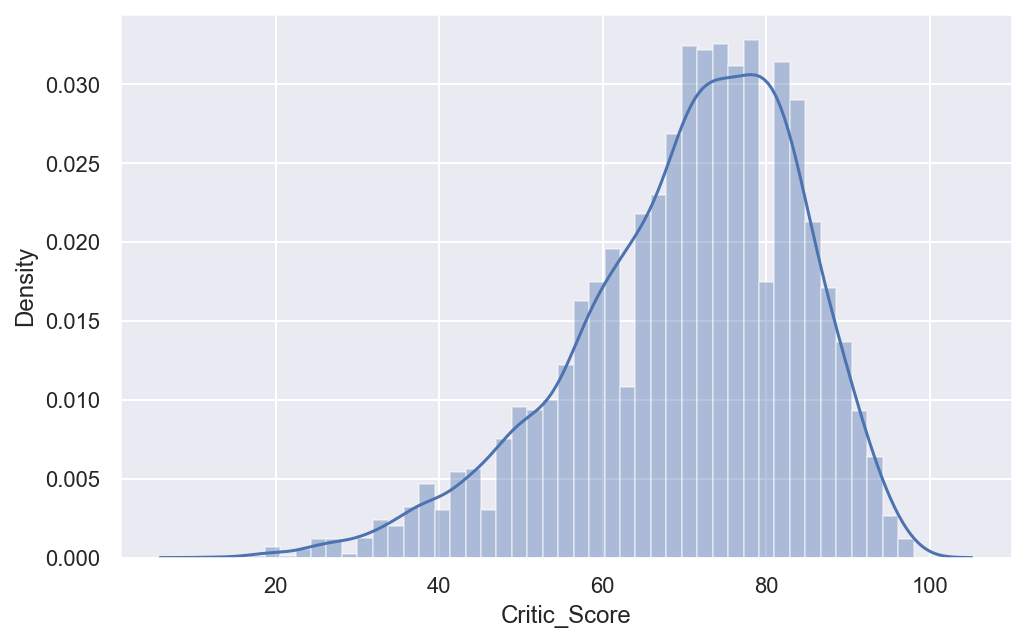

In [9]:
%config InlineBackend.figure_format='retina'
sns.distplot(df['Critic_Score']);

### Jointplot
두 숫자 변수 간의 관계를 보다 자세히 살펴보기 위해 산점도 및 히스토그램 사이의 교차점인 공동 그림을 사용할 수 있습니다. Critical_Score 기능과 User_Score 기능이 어떻게 관련되어 있는지 알아보겠습니다.

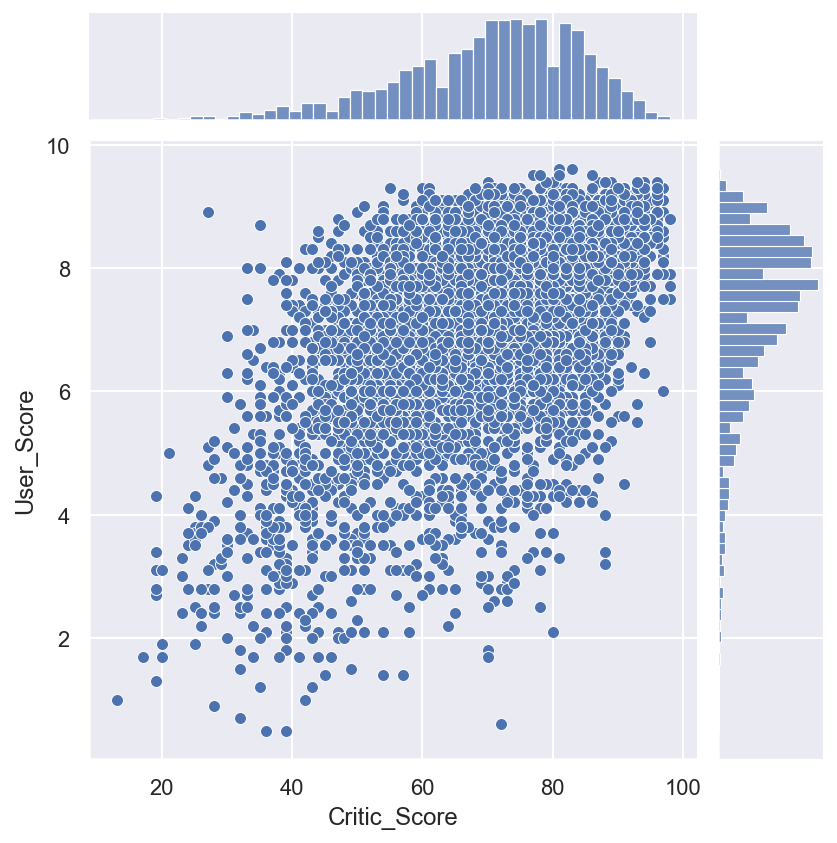

In [10]:
sns.jointplot(x='Critic_Score',y='User_Score',data=df,kind='scatter')

### Boxplot
또 다른 유용한 유형의 플롯은 상자 그림입니다. 상위 5대 게임 플랫폼에 대한 평론가들의 평점을 비교해 봅시다.

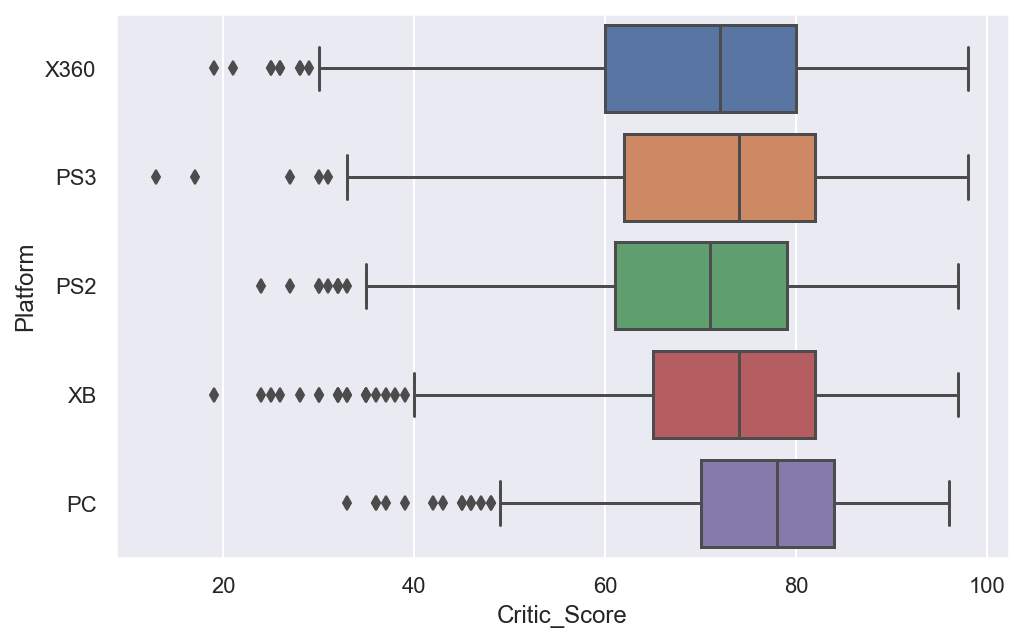

In [11]:
top_platforms = (
    df["Platform"].value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="Platform",
    x="Critic_Score",
    data=df[df["Platform"].isin(top_platforms)],
    orient="h",
);

상자 그림을 해석하는 방법에 대해 좀 더 토론하는 것은 가치가 있다. 해당 성분은 상자(분명히 상자 그림이라고 하는 이유), 이른바 수염 및 여러 개별 점(이상치)입니다.

상자 자체에는 25%(Q1) 및 75%(Q3) 백분위수로 결정된 분포의 사분위간 산포도가 표시됩니다. 상자 안의 수직선은 분포의 중위수(50%)를 나타냅니다.

구레나룻은 상자에서 뻗어 나온 선이다. 데이터 점의 전체 산란, 특히 구간 내에 있는 점(Q1−1.5⋅IQR,Q3+1.5⋅IQR)을 나타냅니다. 여기서 IQR=Q3-Q1은 사분위간 범위입니다.

수염에 의해 경계가 지정된 범위를 벗어나는 특이치는 개별적으로 표시됩니다.

### heatmap
여기서 다룰 마지막 플롯 유형은 열 지도입니다. 열 지도를 사용하면 두 범주형 변수에 대한 숫자 변수의 분포를 볼 수 있습니다. 게임 장르별, 게임 플랫폼별 총 판매량을 시각화해 보겠습니다.

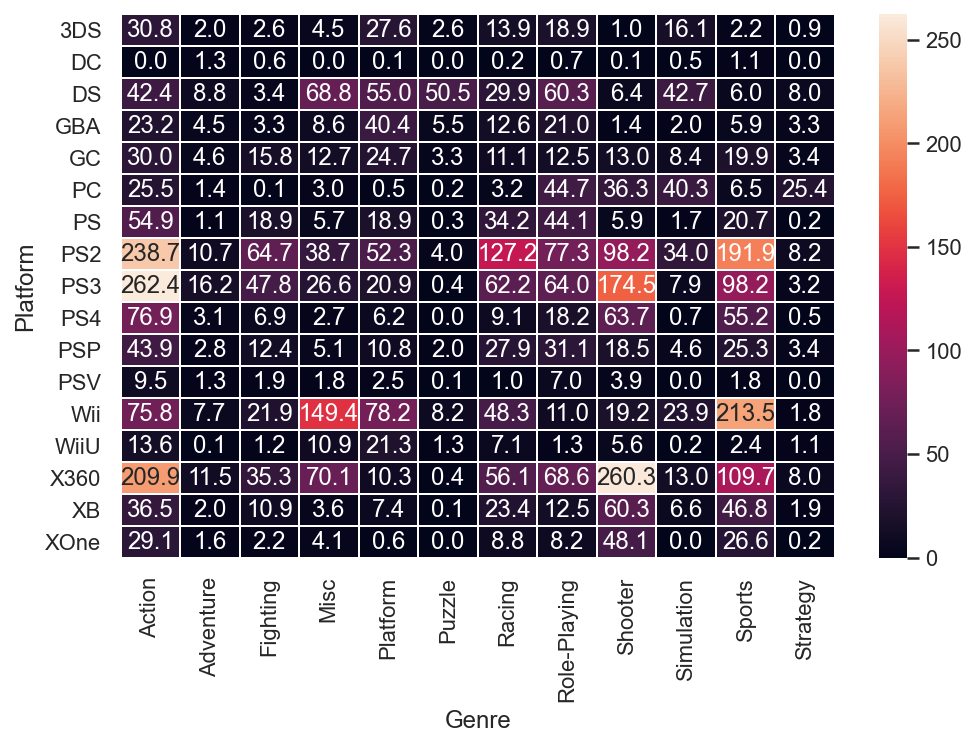

In [12]:
platform_genre_sales=(
    df.pivot_table(
        index='Platform',columns='Genre',values='Global_Sales',aggfunc=sum
    )#aggfunc=2개의 그룹화 기준을 가지고 values에 들어간 특정열에 적용시킬 통계함수를 문자열로 표현
    .fillna(0)
    .applymap(float)
)
sns.heatmap(platform_genre_sales,annot=True,fmt='.1f',linewidths=0.5);

## 4. Plotly
매트플롯lib 라이브러리를 기반으로 몇 가지 시각화 도구를 검토했습니다. 그러나 Python에서 플롯을 위한 유일한 옵션은 아닙니다. plotly library을 살펴보자. 플롯리는 Javascript를 사용하지 않고도 주피터 노트북 내에 대화형 플롯을 만들 수 있는 오픈 소스 라이브러리입니다.

대화형 플롯의 진정한 장점은 상세한 데이터 탐색을 위한 사용자 인터페이스를 제공한다는 것이다. 예를 들어, 점 위에 마우스를 대고, 시각화에서 관심 없는 영상 시리즈를 숨기고, 플롯의 특정 부분을 확대하여 정확한 숫자 값을 볼 수 있습니다.

시작하기 전에 필요한 모든 모듈을 가져오고 init_notebook_mode() 기능을 호출하여 플롯으로 초기화합니다.

In [14]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,iplot,plot

init_notebook_mode(connected=True)
#주피터 노트북에서 오프라인으로 플로팅하기 위해 plotly.offline.iplot을 
#사용할 때 각 노트북 세션의 시작 부분에 plotly.offline.init_notebook_mode()를 실행하는 추가 초기화 단계가 있습니다. 

### Lineplot
우선, 출시되는 게임 수와 연도별 판매량을 나타내는 라인 플롯을 작성합니다.

In [16]:
years_df = (
    df.groupby("Year_of_Release")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Year_of_Release")[["Name"]].count())
)
years_df.columns = ["Global_Sales", "Number_of_Games"]

Figure은 줄거리상 시각화의 주요 요소이자 작업마이다. 데이터(이 라이브러리에서 트레이스라고 하는 선 배열)와 스타일(레이아웃 객체로 표시됨)로 구성됩니다. 가장 간단한 경우에는 iplot 함수를 호출하여 트레이스만 반환할 수 있습니다.

show_link 매개 변수는 차트에서 온라인 플랫폼 plot.ly으로 연결되는 링크의 표시 여부를 전환합니다. 대부분의 경우 이 기능은 필요하지 않으므로 실수로 해당 링크를 클릭하지 않도록 show_link=False를 전달하여 끄는 것이 좋습니다.

In [18]:
# 글로벌 매출 라인(추적) 생성
trace0=go.Scatter(x=years_df.index,y=years_df['Global_Sales'],name='Global Sales')

# 출시 게임 수에 대한 라인(추적) 생성
trace1=go.Scatter(x=years_df.index,y=years_df['Number_of_Games'],name='Number of games released')
# Define the data array
data=[trace0,trace1]
# Set the title
layout = {"title": "Statistics for video games"}

fig=go.Figure(data=data,layout=layout)
iplot(fig,show_link=False)


### 막대 차트
막대형 차트를 사용하여 다양한 게임 플랫폼의 시장 점유율을 새로운 릴리즈의 수와 총 매출별로 비교해 보겠습니다.

In [20]:
# 계산 후 데이터셋 준비
platforms_df=(
    df.groupby('Platform')[['Global_Sales']].sum()
    .join(df.groupby('Platform')['Name'].count())
)
platforms_df.columns=['Global_Sales','Number_of_Games']
platforms_df.sort_values('Global_Sales',ascending=False,inplace=True)

In [21]:
trace0=go.Bar(
    x=platforms_df.index,y=platforms_df['Global_Sales'],name='Global Sales')

trace1=go.Bar(
    x=platforms_df.index,
    y=platforms_df['Number_of_Games'],
    name='Number of games released')

data=[trace0,trace1]
layout={'title':'Market share by gaming platform'}

fig=go.Figure(data=data,layout=layout)
iplot(fig,show_link=False)

### boxplot
plotly에서는 상자 그림도 지원합니다. 게임의 장르별 평론가들의 평점 분포를 고려해 봅시다.

In [24]:
data = []

# Create a box trace for each genre in our dataset
for genre in df.Genre.unique():
    data.append(go.Box(y=df[df.Genre == genre].Critic_Score, name=genre))

# Visualize
iplot(data, show_link=False)